In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr

from pathlib import Path

HERE = Path().cwd()
BAPSF_MOTION = (HERE / ".." / ".." / ".." / "src").resolve()
sys.path.append(str(BAPSF_MOTION))

plt.rcParams.update(
    {
        # "figure.figsize": [12, 0.56 * 12],
        "figure.figsize": [12, 0.8 * 12],
        "font.size": 16,
    }
)
# )["figure.figsize"] = [12, 0.56 * 12]
# plt.rcParams["font.size"] = 14

In [47]:
from bapsf_motion.motion_list.exclusions import CircularExclusion

## LaPD Exclusion in XY

Create the seeding boolean mask.  In the boolean mask a `True` value indicates a point allowed for a motion list and a `False` value indicaes an exclusion zone.

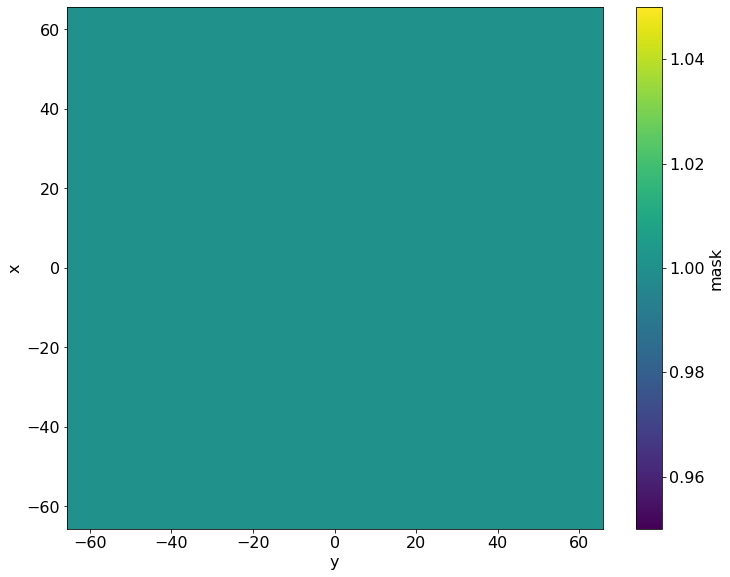

In [50]:
size = 100
side = np.linspace(-65, 65, num=size)
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ds.mask.plot()

Add a circular XY exclusion that simulates the LaPD inner diameter

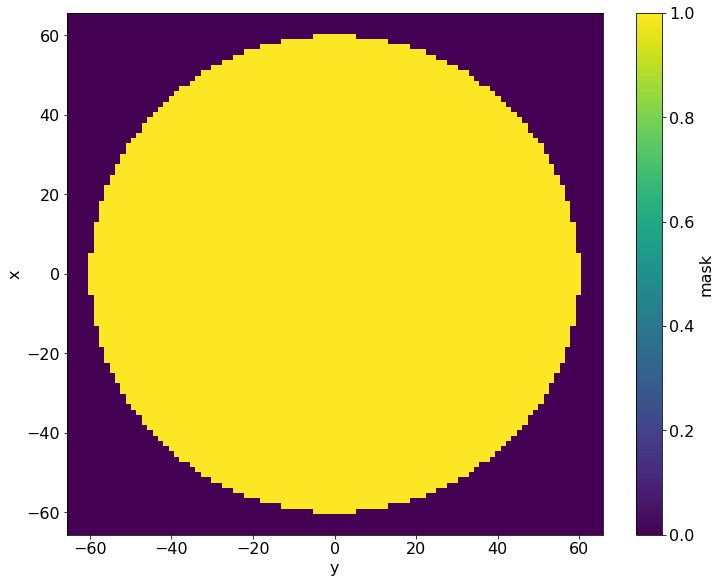

In [51]:
ex1 = CircularExclusion(ds, radius=60)
# ex2 = CircularExclusion(ds, radius=2, center=(1.0, 1.0), exclude="inside")
ds["mask"].plot();